In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import yfinance as yf # type: ignore

# Load financial data

In [2]:
data = yf.download('AAPL')

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600


In [4]:
X = data.to_numpy()
X.shape

(11089, 6)

In [5]:
def create_sequence(data: np.ndarray, seq_len: int = 8) -> tuple[np.ndarray, np.ndarray]:
    X = []
    y = []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()

X_train, X_test = train_test_split(X, test_size=0.2)

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

print(f'Train: {X_train.shape}, Test: {X_test.shape}')

Train: (8871, 6), Test: (2218, 6)


In [7]:
X_train, y_train = create_sequence(X_train)
X_test, y_test = create_sequence(X_test)

print(f'X, y_train: {X_train.shape} {y_train.shape}')
print(f'X, y_test: {X_test.shape} {y_test.shape}')

X, y_train: (8863, 8, 6) (8863, 6)
X, y_test: (2210, 8, 6) (2210, 6)


# Transformer

In [8]:
"""from torch_transformer import Transformer
import torch

src_vocab_size = 5000
tgt_vocab_size = 5000
d_model = 6
num_heads = 3
num_layers = 6
d_ff = 2048
max_seq_length = 8
dropout = 0.1

#device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
print(f'Available device: {device}')

#transformer = Transformer(src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout)
#transformer = transformer.to(device)

X_train, X_test, y_train, y_test = torch.Tensor(X_train), torch.Tensor(X_test), torch.Tensor(y_train), torch.Tensor(y_test)
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

# Generate random sample data
#src_data = torch.randint(1, src_vocab_size, (64, max_seq_length)).to(device)  # (batch_size, seq_length)
#tgt_data = torch.randint(1, tgt_vocab_size, (64, max_seq_length)).to(device)  # (batch_size, seq_length)"""

"from torch_transformer import Transformer\nimport torch\n\nsrc_vocab_size = 5000\ntgt_vocab_size = 5000\nd_model = 6\nnum_heads = 3\nnum_layers = 6\nd_ff = 2048\nmax_seq_length = 8\ndropout = 0.1\n\n#device = 'cuda' if torch.cuda.is_available() else 'cpu'\ndevice = 'cpu'\nprint(f'Available device: {device}')\n\n#transformer = Transformer(src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout)\n#transformer = transformer.to(device)\n\nX_train, X_test, y_train, y_test = torch.Tensor(X_train), torch.Tensor(X_test), torch.Tensor(y_train), torch.Tensor(y_test)\nX_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)\n\n# Generate random sample data\n#src_data = torch.randint(1, src_vocab_size, (64, max_seq_length)).to(device)  # (batch_size, seq_length)\n#tgt_data = torch.randint(1, tgt_vocab_size, (64, max_seq_length)).to(device)  # (batch_size, seq_length)"

In [9]:
"""import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.Adam(transformer.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

transformer.train()

for epoch in range(100):
    optimizer.zero_grad()
    output = transformer(X_train, y_train)
    loss = criterion(output.contiguous().view(-1, tgt_vocab_size), y_train[:, 1:].contiguous().view(-1))
    loss.backward()
    optimizer.step()
    print(f"Epoch: {epoch+1}, Loss: {loss.item()}")"""

'import torch.nn as nn\nimport torch.optim as optim\n\ncriterion = nn.CrossEntropyLoss(ignore_index=0)\noptimizer = optim.Adam(transformer.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)\n\ntransformer.train()\n\nfor epoch in range(100):\n    optimizer.zero_grad()\n    output = transformer(X_train, y_train)\n    loss = criterion(output.contiguous().view(-1, tgt_vocab_size), y_train[:, 1:].contiguous().view(-1))\n    loss.backward()\n    optimizer.step()\n    print(f"Epoch: {epoch+1}, Loss: {loss.item()}")'

In [10]:
"""transformer.eval()

# Generate random sample validation data
#val_src_data = torch.randint(1, src_vocab_size, (64, max_seq_length)).to(device)  # (batch_size, seq_length)
#val_tgt_data = torch.randint(1, tgt_vocab_size, (64, max_seq_length)).to(device)  # (batch_size, seq_length)

with torch.no_grad():

    val_output = transformer(X_test, y_test)
    val_loss = criterion(val_output.contiguous().view(-1, tgt_vocab_size), y_test.contiguous().view(-1))
    print(f"Validation Loss: {val_loss.item()}")"""

'transformer.eval()\n\n# Generate random sample validation data\n#val_src_data = torch.randint(1, src_vocab_size, (64, max_seq_length)).to(device)  # (batch_size, seq_length)\n#val_tgt_data = torch.randint(1, tgt_vocab_size, (64, max_seq_length)).to(device)  # (batch_size, seq_length)\n\nwith torch.no_grad():\n\n    val_output = transformer(X_test, y_test)\n    val_loss = criterion(val_output.contiguous().view(-1, tgt_vocab_size), y_test.contiguous().view(-1))\n    print(f"Validation Loss: {val_loss.item()}")'

# Encoder only Transformer

In [14]:
from torch_fin_transformer import FinancialTransformer
import torch

batch_size = 1
seq_len = 8
n_features = 6  # Number of financial indicators

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Create model instance
model = FinancialTransformer(d_model=n_features, n_heads=8, d_ff=2048, n_enc_layers=3, n_features=n_features)
model = model.to(device)

X_train, X_test, y_train, y_test = torch.Tensor(X_train), torch.Tensor(X_test), torch.Tensor(y_train), torch.Tensor(y_test)
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

In [15]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.98), eps=1e-9)

#output = model(X_train)
#print(f'output: {output.shape}, y: {y_train.shape}')

model.train()

for epoch in range(100):
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    print(f"Epoch: {epoch+1}, Loss: {loss.item()}")

Epoch: 1, Loss: 1.190137267112732
Epoch: 2, Loss: 1.387156367301941
Epoch: 3, Loss: 1.1966307163238525
Epoch: 4, Loss: 1.0912946462631226
Epoch: 5, Loss: 1.0628225803375244
Epoch: 6, Loss: 1.0613901615142822
Epoch: 7, Loss: 1.0580413341522217
Epoch: 8, Loss: 1.0491029024124146
Epoch: 9, Loss: 1.0368047952651978
Epoch: 10, Loss: 1.0259593725204468
Epoch: 11, Loss: 1.0179976224899292
Epoch: 12, Loss: 1.012902021408081
Epoch: 13, Loss: 1.009433627128601
Epoch: 14, Loss: 1.007188320159912
Epoch: 15, Loss: 1.0058451890945435
Epoch: 16, Loss: 1.004948616027832
Epoch: 17, Loss: 1.004611849784851
Epoch: 18, Loss: 1.004868507385254
Epoch: 19, Loss: 1.005079746246338
Epoch: 20, Loss: 1.0053962469100952
Epoch: 21, Loss: 1.0055959224700928
Epoch: 22, Loss: 1.005725622177124
Epoch: 23, Loss: 1.0053038597106934
Epoch: 24, Loss: 1.0047237873077393
Epoch: 25, Loss: 1.0038981437683105
Epoch: 26, Loss: 1.003066062927246
Epoch: 27, Loss: 1.0023550987243652
Epoch: 28, Loss: 1.0017704963684082
Epoch: 29, L

In [16]:
model.eval()

# Generate random sample validation data
#val_src_data = torch.randint(1, src_vocab_size, (64, max_seq_length)).to(device)  # (batch_size, seq_length)
#val_tgt_data = torch.randint(1, tgt_vocab_size, (64, max_seq_length)).to(device)  # (batch_size, seq_length)

with torch.no_grad():

    val_output = model(X_test)
    val_loss = criterion(val_output, y_test)
    print(f"Validation Loss: {val_loss.item()}")

Validation Loss: 0.9868223071098328


In [24]:
true_unscaled = scaler_X.inverse_transform(y_test.cpu())[:20]
predicted_unscaled = scaler_X.inverse_transform(val_output.cpu())[:20]
print(f'Shapes: {true_unscaled.shape}, {predicted_unscaled.shape}')

Shapes: (20, 6), (20, 6)


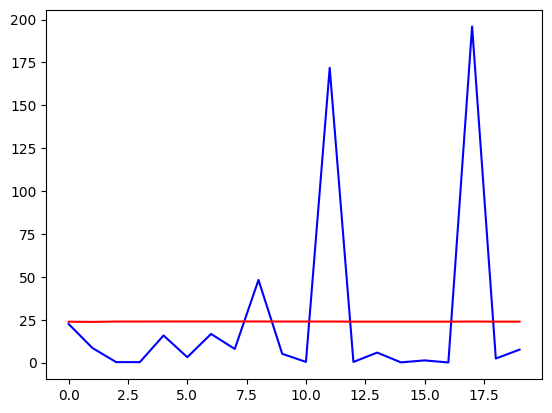

In [27]:
x = [i for i in range(len(true_unscaled))]
plt.plot(x, true_unscaled[:, 3], color='blue')
plt.plot(x,predicted_unscaled[:, 3], color='red')
plt.show()